In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [17]:
tickers = ['AMZN', 'BMY', 'FL', 'CNP', 'CVX']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close']

In [ ]:
mydata.head(10)

,AMZN,BMY,FL,CNP,CVX
Date,,,,,
2012-01-03,179.029999,25.566389,18.716820,13.322020,72.389854
2012-01-04,177.509995,25.323046,18.818243,13.255041,72.265221
2012-01-05,177.610001,25.190310,19.301956,13.261738,71.556870
2012-01-06,182.610001,25.234558,19.473600,13.087598,71.038750
2012-01-09,178.559998,25.005959,19.528215,13.194759,71.812668
2012-01-10,179.339996,25.529520,19.497004,13.094294,71.530624
2012-01-11,178.899994,25.146065,19.359568,12.940241,70.684540
2012-01-12,175.929993,25.160814,19.461666,12.833078,68.848061
2012-01-13,178.419998,24.924837,19.406685,12.786196,69.582657


In [ ]:
mydata.iloc[0]

AMZN    179.029999
BMY      25.566389
FL       18.716820
CNP      13.322020
CVX      72.389854
Name: 2012-01-03 00:00:00, dtype: float64

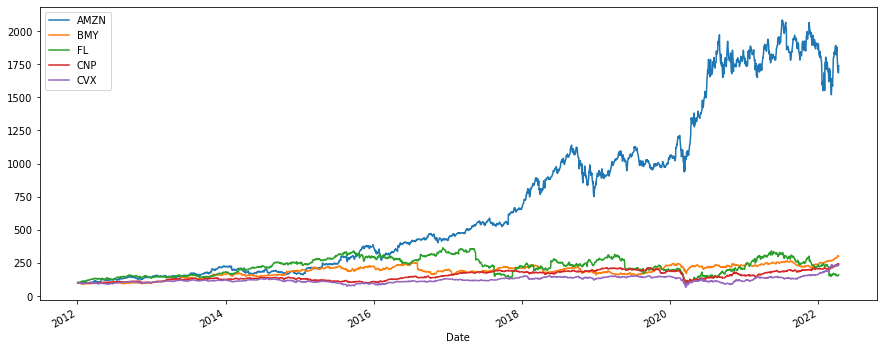

In [ ]:
(mydata/mydata.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

## Returns

In [ ]:
returns = (mydata / mydata.shift(1)) -1
returns

,AMZN,BMY,FL,CNP,CVX
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.008490,-0.009518,0.005419,-0.005028,-0.001722
2012-01-05,0.000563,-0.005242,0.025704,0.000505,-0.009802
2012-01-06,0.028152,0.001757,0.008893,-0.013131,-0.007241
2012-01-09,-0.022178,-0.009059,0.002805,0.008188,0.010894
...,...,...,...,...,...
2022-04-07,-0.006120,0.025485,0.006318,0.007554,0.013895
2022-04-08,-0.021067,0.006601,0.004186,0.014995,0.016936
2022-04-11,-0.021614,-0.016330,0.015283,-0.008003,-0.025716


In [ ]:
weights = np.array([6.86, 23.5, 2.50, 25.0, 5.0])

In [ ]:
np.dot(returns, weights)

array([        nan, -0.40267087, -0.09143435, ..., -0.82246829,
        0.14126414,  0.51106915])

In [ ]:
annual_returns = returns.mean() * 250
annual_returns

AMZN    0.322696
BMY     0.135259
FL      0.129363
CNP     0.118153
CVX     0.121439
dtype: float64

In [ ]:
np.dot(annual_returns, weights)

9.27670573140233

In [ ]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5) *100) + '%'
print(pfolio_1)

927.6709999999999%


In [14]:
indcmp = ['^DJI','AMZN', 'BMY', 'FL', 'CNP', 'CVX']

data_2 = pd.DataFrame()


for t in indcmp:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']    

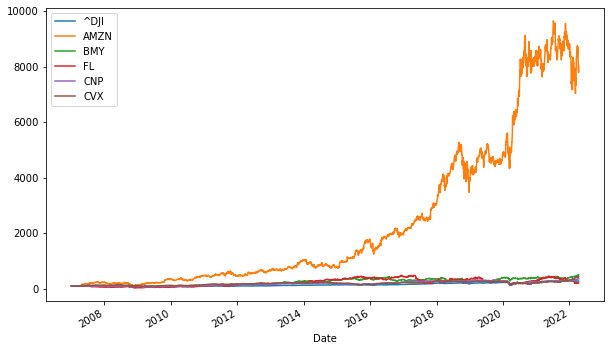

In [18]:
(data_2/data_2.iloc[0] * 100).plot(figsize=(10,6));
plt.show()

In [19]:
ind_returns = (data_2/ data_2.shift(1)) -1
ind_returns.tail()

,^DJI,AMZN,BMY,FL,CNP,CVX
Date,,,,,,
2022-04-07,0.002524,-0.006120,0.025485,0.006318,0.007554,0.013895
2022-04-08,0.003977,-0.021067,0.006601,0.004186,0.014995,0.016936
2022-04-11,-0.011896,-0.021614,-0.016330,0.015283,-0.008003,-0.025716
2022-04-12,-0.002557,-0.002213,0.000654,0.008553,0.000621,0.020838
2022-04-13,0.010059,0.031525,0.004180,0.011533,0.002171,0.015739


In [20]:
annual_ind_returns = ind_returns.mean() *250
annual_ind_returns

^DJI    0.085099
AMZN    0.355665
BMY     0.135836
FL      0.142987
CNP     0.119405
CVX     0.139216
dtype: float64

## Risk

In [21]:
sec_returns = np.log(mydata/mydata.shift(1))
sec_returns

,AMZN,BMY,FL,CNP,CVX
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.008526,-0.009564,0.005405,-0.005040,-0.001724
2012-01-05,0.000563,-0.005255,0.025380,0.000505,-0.009850
2012-01-06,0.027763,0.001755,0.008853,-0.013218,-0.007267
2012-01-09,-0.022428,-0.009100,0.002801,0.008155,0.010835
...,...,...,...,...,...
2022-04-07,-0.006138,0.025165,0.006298,0.007526,0.013799
2022-04-08,-0.021292,0.006579,0.004177,0.014884,0.016794
2022-04-11,-0.021851,-0.016465,0.015167,-0.008035,-0.026053


In [22]:
sec_returns[['AMZN', 'BMY', 'FL', 'CNP', 'CVX']].mean() *250

AMZN    0.275907
BMY     0.105671
FL      0.043689
CNP     0.085646
CVX     0.083447
dtype: float64

In [23]:
sec_returns[['AMZN', 'BMY', 'FL', 'CNP', 'CVX']].std() * 250 ** 0.5

AMZN    0.304926
BMY     0.241078
FL      0.413498
CNP     0.255901
CVX     0.276369
dtype: float64

In [24]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,AMZN,BMY,FL,CNP,CVX
AMZN,0.092980,0.016388,0.020177,0.014321,0.018227
BMY,0.016388,0.058119,0.018114,0.018378,0.021518
FL,0.020177,0.018114,0.170980,0.026570,0.033395
CNP,0.014321,0.018378,0.026570,0.065485,0.035716
CVX,0.018227,0.021518,0.033395,0.035716,0.076380


In [25]:
corr_matrix = sec_returns.corr()
corr_matrix

,AMZN,BMY,FL,CNP,CVX
AMZN,1.000000,0.222932,0.160026,0.183532,0.216291
BMY,0.222932,1.000000,0.181713,0.297896,0.322964
FL,0.160026,0.181713,1.000000,0.251100,0.292229
CNP,0.183532,0.297896,0.251100,1.000000,0.505007
CVX,0.216291,0.322964,0.292229,0.505007,1.000000


In [26]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov()* 250, weights))
pfolio_var

0.036382135024975504

In [27]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov()* 250, weights))) ** 0.5
pfolio_vol

0.19074101558127318

In [28]:
print(str(round(pfolio_vol, 5) * 100) + '%') 

19.073999999999998%


## Efficient frontier analysis

In [29]:
assets = ['AMZN', '^DJI']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2013-1-5')['Adj Close']

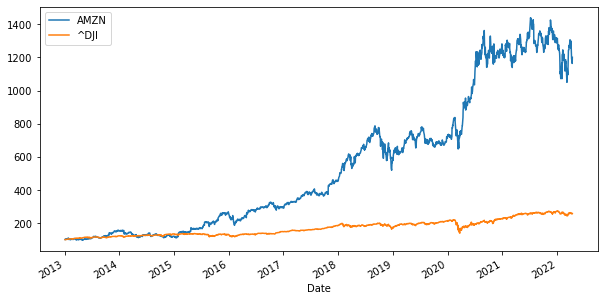

In [30]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5));

In [31]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [32]:
log_returns.mean() * 250

AMZN    0.266085
^DJI    0.101172
dtype: float64

In [33]:
num_assets = len(assets)
num_assets

2

In [34]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51826402, 0.48173598])

In [35]:
np.sum(weights * log_returns.mean()) * 250 # Expected return

0.18664074201680825

In [36]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))) # Expected volatility

0.20999904940222863

In [37]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([0.17646753, 0.11668429, 0.13684793, 0.18046135, 0.18940805,
        0.23818503, 0.17758535, 0.17990183, 0.1856731 , 0.17926075,
        0.21590374, 0.17121047, 0.2529214 , 0.1320079 , 0.17896216,
        0.19523751, 0.14443775, 0.17869922, 0.18914632, 0.18355169,
        0.22482732, 0.19948523, 0.19166819, 0.22245703, 0.18501774,
        0.20836954, 0.12470787, 0.18919599, 0.10205201, 0.15721355,
        0.21023161, 0.18234529, 0.16990304, 0.21383083, 0.15410151,
        0.2484283 , 0.13451671, 0.1985661 , 0.16422058, 0.20726023,
        0.17057985, 0.16670482, 0.17763472, 0.25790494, 0.16468963,
        0.20037365, 0.13361193, 0.18288936, 0.11048303, 0.14516119,
        0.24881668, 0.17797519, 0.18637826, 0.1571426 , 0.17921305,
        0.14221282, 0.23450708, 0.14769355, 0.24784691, 0.1425213 ,
        0.13536074, 0.18620259, 0.21624858, 0.23094733, 0.11273214,
        0.16444889, 0.18116356, 0.21707043, 0.17227567, 0.25438354,
        0.12650438, 0.17847385, 0.23860728, 0.17

In [38]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


Text(0, 0.5, 'Expected Return')

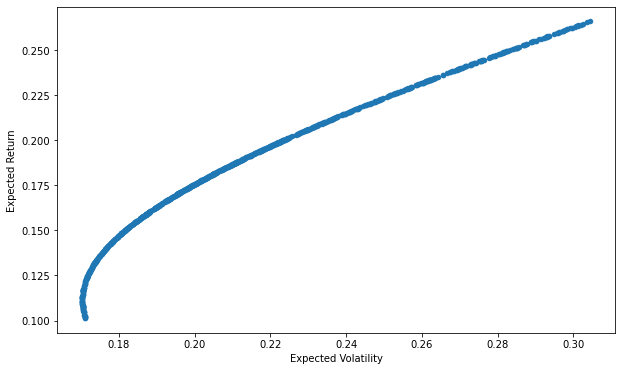

In [39]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [40]:
tickers = ['AMZN', '^DJI']
data= pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t,data_source='yahoo', start='2012-1-1', end='2021-1-1')['Adj Close']

In [41]:
sec_returns = np.log(data/data.shift(1))

In [42]:
cov = sec_returns.cov() * 250
cov

,AMZN,^DJI
AMZN,0.093068,0.024747
^DJI,0.024747,0.029236


In [43]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.024747190252350722

In [44]:
market_var = sec_returns['^DJI'].var() * 250
market_var

0.02923615408285319

In [45]:
AMZN_beta = cov_with_market / market_var # Beta value
AMZN_beta

0.8464584699553483

In [46]:
AMZN_er = 0.026 + AMZN_beta * 0.05
AMZN_er

0.06832292349776742

In [47]:
Sharpe = (AMZN_er - 0.025) / (sec_returns['AMZN'].std() * 250 ** 0.5)
Sharpe

0.14200948760737472

In [48]:
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-1-3')['Adj Close']

log_returns = np.log(1 + data.pct_change())

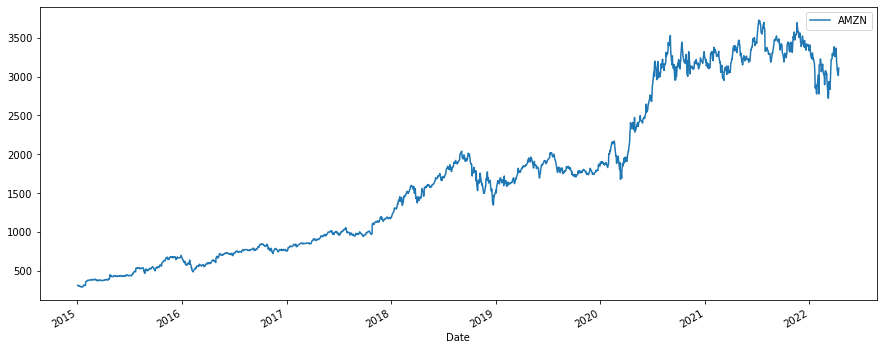

In [49]:
data.plot(figsize = (15,6));

<AxesSubplot:xlabel='Date'>

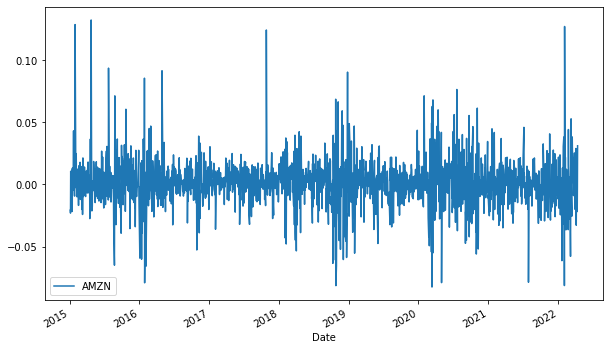

In [50]:
log_returns.plot(figsize = (10,6))

In [51]:
u = log_returns.mean()
u

AMZN    0.001261
dtype: float64

In [52]:
var = log_returns.var()
var

AMZN    0.000374
dtype: float64

In [53]:
drift = u - (0.5 * var)
drift

AMZN    0.001074
dtype: float64

In [54]:
stdev = log_returns.std()
stdev

AMZN    0.019349
dtype: float64

In [55]:
type(drift)

pandas.core.series.Series

In [56]:
np.array(drift)

array([0.00107351])

In [57]:
stdev.values

array([0.01934874])

In [58]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
norm.ppf(0.95)

1.6448536269514722

In [59]:
x = np.random.rand(10,2)
x

array([[0.66181354, 0.13107609],
       [0.95110359, 0.49027065],
       [0.79916337, 0.2063423 ],
       [0.32859003, 0.64576524],
       [0.74879509, 0.52721869],
       [0.77683894, 0.82396805],
       [0.21757923, 0.67845102],
       [0.60930562, 0.00494379],
       [0.66385209, 0.11843508],
       [0.03540096, 0.60390331]])

In [60]:
norm.ppf(x)

array([[ 0.41741769, -1.12131879],
       [ 1.65564952, -0.02439029],
       [ 0.8386366 , -0.81917847],
       [-0.44380987,  0.37391236],
       [ 0.67070289,  0.06828016],
       [ 0.76156091,  0.93059346],
       [-0.7803949 ,  0.4633717 ],
       [ 0.27750969, -2.57973659],
       [ 0.42299924, -1.18284605],
       [-1.80674585,  0.26346346]])

In [61]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.35608623, -0.25073447],
       [ 0.04408972,  0.48559399],
       [-0.12471623,  0.38572245],
       [-0.42079372,  0.015188  ],
       [ 1.68333609,  0.08918322],
       [ 0.01177503,  0.44347102],
       [-0.71534338, -2.6821465 ],
       [-0.36840582, -0.1301808 ],
       [-0.78423788,  0.02199169],
       [-1.06317384, -0.53936852]])

In [62]:
t_intervals = 1000
iterations = 10
daily_returns = np.exp(drift.values+ stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [63]:
daily_returns

array([[0.99492435, 1.01017621, 1.01089374, ..., 0.99125176, 0.98653135,
        1.00421907],
       [1.0109522 , 0.96358212, 1.00987945, ..., 1.02594456, 1.00034344,
        0.99785728],
       [1.02136472, 1.01572094, 1.03582099, ..., 1.01173326, 0.9891102 ,
        0.99977656],
       ...,
       [1.00592416, 1.00802957, 0.99626467, ..., 0.99621218, 1.00314088,
        1.05293591],
       [0.98722836, 0.99909236, 0.98357716, ..., 0.98744592, 0.96140115,
        1.00875578],
       [1.01268893, 0.96202609, 0.97800363, ..., 1.01199299, 1.01682144,
        1.0293894 ]])

In [64]:
S0 =data.iloc[-1]
S0

AMZN    3110.820068
Name: 2022-04-13 00:00:00, dtype: float64

In [65]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
price_list[0] = S0
price_list

array([[3110.82006836, 3110.82006836, 3110.82006836, ..., 3110.82006836,
        3110.82006836, 3110.82006836],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [67]:
for t in range( 1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [68]:
price_list

array([[ 3110.82006836,  3110.82006836,  3110.82006836, ...,
         3110.82006836,  3110.82006836,  3110.82006836],
       [ 3144.89038951,  2997.53059892,  3141.55324925, ...,
         3191.52891848,  3111.88844446,  3104.15444142],
       [ 3212.08008186,  3044.65460273,  3254.08678582, ...,
         3228.97594708,  3078.00061423,  3103.46084592],
       ...,
       [ 2142.74313129,  9404.9425189 ,  8469.37090179, ...,
        12676.01462226, 11145.23219228,  2414.43091315],
       [ 2115.37678941,  9396.40619431,  8330.27975628, ...,
        12516.87890148, 10715.03901656,  2435.57114522],
       [ 2142.21865693,  9039.58790814,  8147.04385088, ...,
        12666.99366855, 10895.28136699,  2507.15112061]])

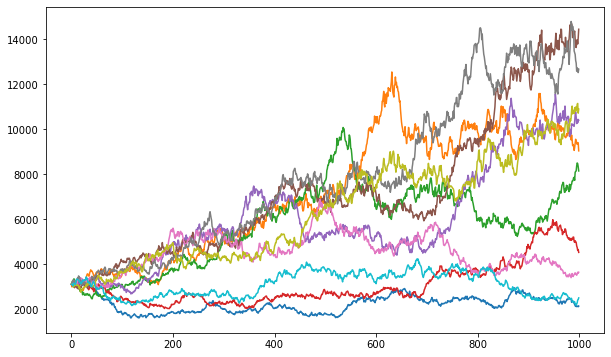

In [69]:
plt.figure(figsize=(10,6))
plt.plot(price_list);